In [1]:
# Imports
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import random
import time

In [2]:
def gen_img(pattern):
    pattern = pattern.reshape(edg, edg)
    p1 = plt.imshow(pattern)
    return p1

In [3]:
edg = 64
cd = os.getcwd()
logpath = cd+"\\logs"
if os.path.isdir(logpath) == False:
    os.mkdir(logpath)
    print("Log Directory created.")
else:
    print("Log Directory existed.")

Log Directory existed.


In [129]:
# Load training and eval data
path = cd + "\\patterns"

N=5000
train_N = 4000
eval_N = 1000
n_per_label = 100
max_label = 10
shape = 0
size = 5

#load patterns and labels
title = "\\patterns_random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"
filename = path + title
data = np.load(filename+".npy")
title = "\\labels_random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"
filename = path + title
labels = np.load(filename+".npy")


train_data = data[:train_N]
train_labels = labels[:train_N]
eval_data = data[train_N:train_N+eval_N]
eval_labels = labels[train_N:train_N+eval_N]

In [131]:
# build model
# number of neurons
N_h1 = 120
N_h2 = 800
N_out = max_label

X = tf.placeholder("float", [None, edg*edg])
Y = tf.placeholder("float", [None, max_label])

# Input Layer
input_layer = tf.reshape(X, [-1, edg*edg])
h1_layer = tf.layers.dense(inputs=input_layer, units=N_h1, activation=tf.nn.relu)
h2_layer = tf.layers.dense(inputs=h1_layer, units=N_h2, activation=tf.nn.relu)
logits = tf.layers.dense(h2_layer, units=N_out)

predictions = tf.argmax(logits, axis=1)

In [132]:
eta = 0.1
y = tf.argmax(Y, axis=1)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
train_op = tf.train.GradientDescentOptimizer(eta).minimize(cost)

In [133]:
epochs = 1000
mseErr = []
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for n_epoch in range(epochs):
    if n_epoch%100 == 0:
        time_start = time.time()
    sess.run(train_op, feed_dict={X: train_data, Y: train_labels})
    Err = 1- (np.mean(np.argmax(train_labels, axis=1)==sess.run(predictions, feed_dict ={X:train_data})))
    mseErr.append(Err)
    if n_epoch%100 == 99:
        time_end = time.time()
        print('Epoch: %d, mean error = %f, used time = %d s'%(n_epoch, Err, time_end - time_start))

Epoch: 99, mean error = 0.613250, used time = 29 s
Epoch: 199, mean error = 0.430750, used time = 29 s
Epoch: 299, mean error = 0.323000, used time = 29 s
Epoch: 399, mean error = 0.193250, used time = 29 s
Epoch: 499, mean error = 0.163250, used time = 29 s
Epoch: 599, mean error = 0.037500, used time = 29 s
Epoch: 699, mean error = 0.017500, used time = 28 s
Epoch: 799, mean error = 0.009250, used time = 28 s
Epoch: 899, mean error = 0.002750, used time = 28 s
Epoch: 999, mean error = 0.001750, used time = 28 s


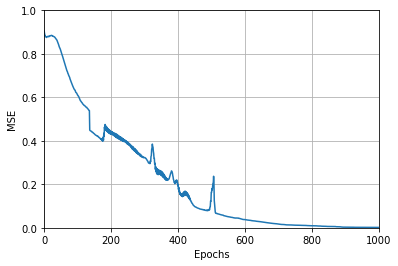

In [134]:
#plot the training data MSE vs. Epochs
f1 = plt.figure()
plt.plot(mseErr)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.ylim([0,1])
plt.xlim([0, len(mseErr)])
plt.show()

In [135]:
#evaluating the training data
seq = random.sample(range(train_N),9)
print(seq)
y = sess.run(predictions, feed_dict={X: [train_data[kk] for kk in seq]})
print(y)
print(np.argmax([train_labels[kk] for kk in seq], axis=1))

[3598, 631, 3924, 3870, 3880, 605, 2225, 2147, 1093]
[7 9 7 6 3 6 2 5 6]
[7 9 7 6 3 6 2 5 6]


[7 9 7 6 3 6 2 5 6]


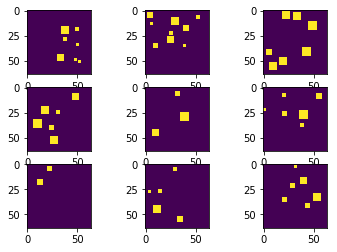

In [136]:
#plot the training data
print(np.argmax(train_labels[seq], axis=1))
f2 = plt.figure()
for ii in range(9):
    plt.subplot(3,3, ii+1)
    gen_img(train_data[seq[ii]])
plt.show(f2)

In [137]:
#evaluating the testing data
seq = random.sample(range(eval_N),9)
y = sess.run(predictions, feed_dict={X: [eval_data[kk] for kk in seq]})
print(y)
print(np.argmax([eval_labels[kk] for kk in seq], axis=1))

[2 9 6 4 2 5 4 5 1]
[3 8 9 4 4 6 3 5 3]


[3 8 9 4 4 6 3 5 3]


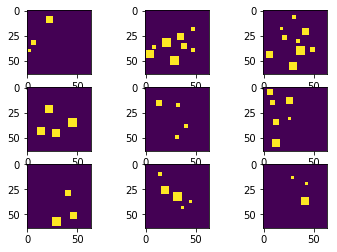

In [138]:
#plot the testing data
print(np.argmax(eval_labels[seq], axis=1))
f3 = plt.figure()
for ii in range(9):
    plt.subplot(3,3, ii+1)
    gen_img(eval_data[seq[ii]])
plt.show(f3)

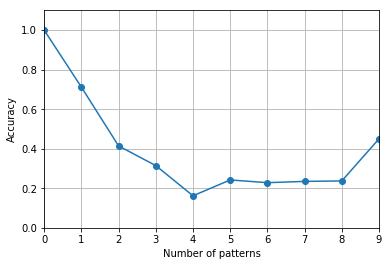

In [139]:
#plot accuracy of each number of patterns of testing data
label_index = np.zeros([max_label])
label_count = np.zeros([max_label])
y = sess.run(predictions, feed_dict={X: eval_data})
y_ = np.argmax(eval_labels, axis =1)
for kk in range(eval_N):
    index = y_[kk]
    label_index[index] = label_index[index] + 1
    if y[kk] == y_[kk]:
        label_count[index] = label_count[index] +1
label_acc = label_count/label_index
label_acc = label_acc.reshape(max_label)
f4 = plt.figure()
plt.plot(label_acc, marker='o')
plt.xlim([0,max_label-1])
plt.ylim([0,1.1])
plt.xlabel('Number of patterns')
plt.ylabel('Accuracy')
plt.grid()
plt.show(f4)

In [140]:
title = "\\random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"+"_FCNN"
filename = path + title

In [141]:
np.save(filename+"_Acc_number", label_acc)
f1.savefig(filename+"_MSE_Epochs.png")
f1.savefig(filename+"_MSE_Epochs.pdf")
f3.savefig(filename+"_PatternSamples.png")
f3.savefig(filename+"_PatternSamples.pdf")
f4.savefig(filename+"_Accuracy_Number.png")
f4.savefig(filename+"_Accuracy_Number.pdf")